In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataset location in Google Drive
import pandas as pd
url = '/content/drive/MyDrive/Ai_Dataset/g_data.csv'

In [ ]:
# Dataset load as pandas.core.frame.DataFrame
df = pd.read_csv(url, delimiter =',')

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x= train_test_split(df, test_size = 0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()
ss.fit(train_x)
ss_train_x = ss.transform(train_x)
ss_test_x = ss.transform(test_x)

[9600.0, 6591.63167389921, 4488.616310353086, 2611.3828257843156, 2181.775921827042, 1900.7843443338988, 1703.5870702588659, 1511.326038122265, 1384.1830394182844]


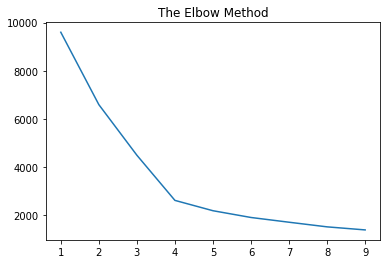

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
cost = []

K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(ss_train_x)
    cost.append(kmeanModel.inertia_)

print(cost)
plt.plot(K, cost)
plt.title('The Elbow Method')
plt.show()

## Plot the train data before kmeans

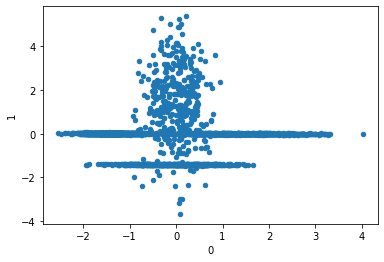

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(ss_train_x)
train_plot = pca.transform(ss_train_x)
train_plot = pd.DataFrame(train_plot)
train_plot.plot.scatter(x=0, y=1, colormap='jet')

## Train without kMeans

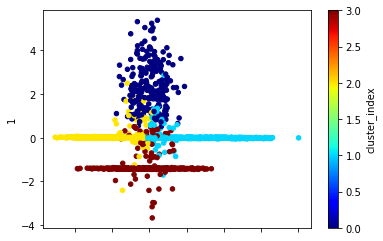

In [ ]:
import random
import numpy as np
from math import sqrt
from statistics import mean

initialCentroids = []

def carryCentroids(k):
    for i in range(k):
        c = []
        for j in range(4):
            c.append(i+j)
        initialCentroids.append(c)

def fit(features, k):
    carryCentroids(k)
    rC = []
    for i in range(0,k):
        index = random.randint(0,len(features)-1)
        rC.append(index)
    initialCentroids = features[rC]

    while True:
        
        shortest_distance = []
        updated_cluster = []

        for row in features:
            distance = []
            for center in initialCentroids:

                dis = sqrt(((row[0]-center[0])**2) + ((row[1]-center[1])**2) + ((row[2]-center[2])**2) + ((row[3]-center[3])**2))
                distance.append(dis)
            init = 99999999999999999999999999
            for i in distance:
                if i < init:
                    init = i
            index_short_distance = distance.index(init)
            shortest_distance.append(index_short_distance)

        previous_centroids = initialCentroids
        unique_clusters = np.unique(shortest_distance)

        for cluster in unique_clusters:
            updated = features[shortest_distance == cluster].mean(axis = 0)
            updated_cluster.append(updated)
        initialCentroids = np.array(updated_cluster)
        if(previous_centroids == initialCentroids).all():
            break


    return shortest_distance

x=fit(ss_train_x, 4)
train_plot['cluster_index'] = pd.Series(x)
train_plot.plot.scatter(x=0, y=1, c='cluster_index', colormap='jet')

## Train using kmeans

In [ ]:
km = KMeans(n_clusters=4, init='random')
km.fit(ss_train_x)

KMeans(init='random', n_clusters=4)

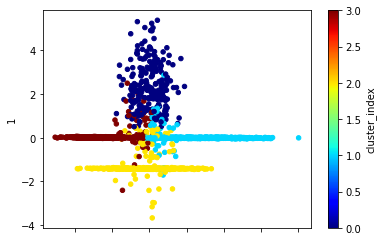

In [ ]:
prediction = km.predict(ss_train_x)
# train_plot = pd.DataFrame(pca.fit_transform(train))
train_plot['cluster_index'] = pd.Series(prediction)
train_plot.plot.scatter(x=0, y=1, c='cluster_index', colormap='jet')

## Plot the test data before prediction

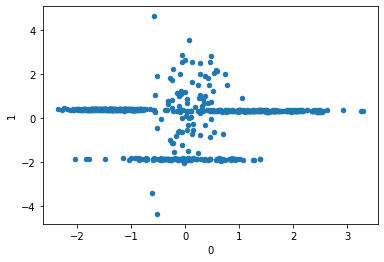

In [ ]:
test_plot = pd.DataFrame(pca.fit_transform(ss_test_x))
test_plot.plot.scatter(x=0, y=1, colormap='jet')

## Predict withouts kMeans

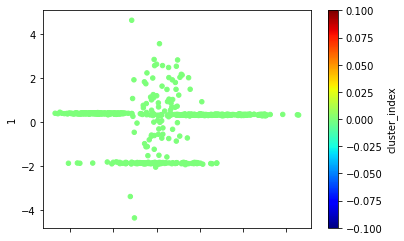

In [ ]:
def predict(features, initialCentroids):

    shortest_distance = []
    for row in features:
        distance = []
        for center in initialCentroids:

            dis = sqrt(((row[0]-center[0])**2) + ((row[1]-center[1])**2) + ((row[2]-center[2])**2) + ((row[3]-center[3])**2))
            distance.append(dis)
        init = 99999999999999999999999999
        for i in distance:
            if i < init:
                init = i
        index_short_distance = distance.index(init)
        shortest_distance.append(index_short_distance)

    return shortest_distance

y=predict(ss_test_x, initialCentroids)

test_plot = pd.DataFrame(pca.fit_transform(ss_test_x))
test_plot['cluster_index'] = pd.Series(y)
test_plot.plot.scatter(x=0, y=1, c='cluster_index', colormap='jet')

## Predict Using kMeans

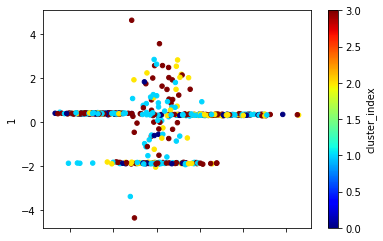

In [ ]:
test_prediction = km.predict(ss_test_x)
test_plot = pd.DataFrame(pca.fit_transform(ss_test_x))
test_plot['cluster_index'] = pd.Series(prediction)
test_plot.plot.scatter(x=0, y=1, c='cluster_index', colormap='jet')